In [2]:
from nptdms import TdmsFile
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# --- TDMS 파일 로드 함수 ---
def load_tdms(file_path: str):
    """
    주어진 파일 경로에서 TDMS 파일을 읽어 반환합니다.
    """
    return TdmsFile.read(file_path)

# --- 사용 가능한 그룹 및 채널 출력 함수 ---
def print_available(tdms_file):
    print("✅ Available groups and channels:")
    group_channel_map = {}
    for group in tdms_file.groups():
        name = group.name
        channels = [ch.name for ch in group.channels()]
        group_channel_map[name] = channels
        print(f" - Group: {name}")
        for ch in channels:
            print(f"    • {ch}")

# --- 간단 플롯 함수 정의 ---
def plot_tdms_channels(
    tdms_file,
    group: str,
    channels: list[str],
    scale: float = 1.0,
    index_range: tuple[int, int] | None = None,
    figsize: tuple[float, float] = (12, 5),
    sample_rate: float | None = None
) -> None:
    """
    그룹 내 여러 채널을 한 플롯에 그립니다.
    """
    if index_range is None:
        first_ch = tdms_file[group][channels[0]]
        index_range = (0, len(first_ch))
    start, end = index_range

    fig, ax = plt.subplots(figsize=figsize)
    for name in channels:
        ch = tdms_file[group][name]
        data = ch[:] * scale
        if sample_rate is not None:
            x_all = np.arange(len(data)) / sample_rate
            xlabel = "Time (s)"
        else:
            x_all = np.arange(len(data))
            xlabel = "Index"
        ax.plot(x_all[start:end], data[start:end], label=name)

    ax.set_title(f"Group: {group} | Channels: {', '.join(channels)} (×{scale:.1f})")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()


def plot_when_trajectory_is_one(
    tdms_file,
    group: str,
    signal_channel: str,
    trajectory_channel: str = "Trajectory",
    scale: float = 1.0,
    index_range: tuple[int, int] | None = None,
    figsize: tuple[float, float] = (10, 4),
    sample_rate: float | None = None
):
    """
    Trajectory 값이 1일 때만 signal_channel을 플롯합니다.
    나머지는 0으로 처리됩니다.
    """
    # --- 채널 데이터 로딩 ---
    signal = tdms_file[group][signal_channel][:]
    traj = tdms_file[group][trajectory_channel][:]

    # --- 길이 맞추기 ---
    min_len = min(len(signal), len(traj))
    signal = signal[:min_len] * scale
    traj = traj[:min_len]

    # --- Trajectory 값이 1인 부분만 유지, 나머지 0 처리 ---
    masked_signal = np.where(traj == 1, signal, 0)

    # --- 인덱스 범위 설정 ---
    if index_range is None:
        index_range = (0, min_len)
    start, end = index_range

    # --- X축 생성 ---
    if sample_rate is not None:
        x = np.arange(min_len) / sample_rate
        xlabel = "Time (s)"
    else:
        x = np.arange(min_len)
        xlabel = "Index"

    # --- 플롯 ---
    plt.figure(figsize=figsize)
    plt.plot(x[start:end], masked_signal[start:end], label=f"{signal_channel} (Trajectory == 1)")
    plt.xlabel(xlabel)
    plt.ylabel("Value")
    plt.title(f"{signal_channel} when {trajectory_channel} == 1")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [4]:
# tdms1 = load_tdms("data/25-04-29.tdms")
# tdms2 = load_tdms("data/25-04-30_2.tdms")  # 맨 앞과 뒤 데이터만 사용; 사람없이 궤적:15초, 빈 박스들고 
# tdms3 = load_tdms("data/25-04-30_3.tdms")  # 학습X, 일정한 임피던스
# tdms4 = load_tdms("data/25-05-02_2.tdms")  # 학습X, 일정한 임피던스
# tdms5 = load_tdms("data/25-05-02_ajw.tdms")  # 
# tdms6 = load_tdms("data/25-05-09_1.tdms") # 이게 나중에 한거
# tdms7 = load_tdms("data/25-05-09_2.tdms") # 이게 먼저 한거



KeyboardInterrupt: 

In [ ]:
# print_available(tdms1)
print_available(tdms6)

✅ Available groups and channels:
 - Group: Datas
    • Time (ms)
    • Reference Position X
    • Reference Position Y
    • Measured Position X
    • Measured Position Y
    • Reference Tension L
    • Reference Tension R
    • Reference Tension T
    • Measured Tension L
    • Measured Tension R
    • Measured Tension T
    • RBF1
    • RBF2
    • RBF3
    • Trajectory
    • Assist?
    • Force Norm
    • Damp1
    • Damp2
    • Damp3


### 04-30 Box Lift Test

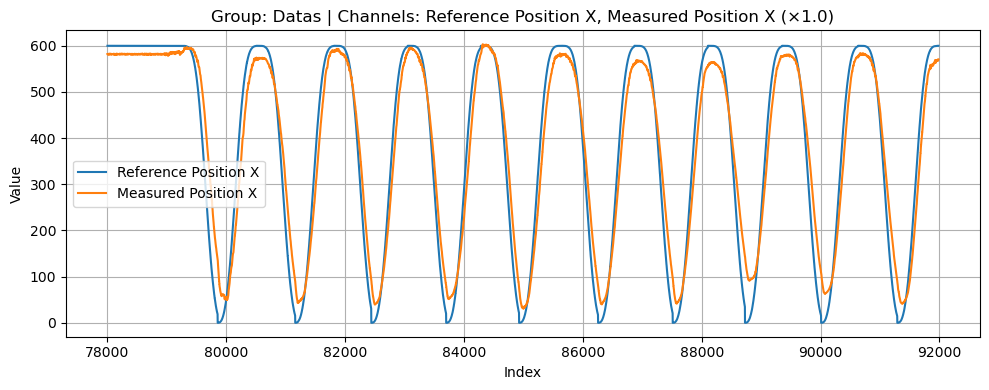

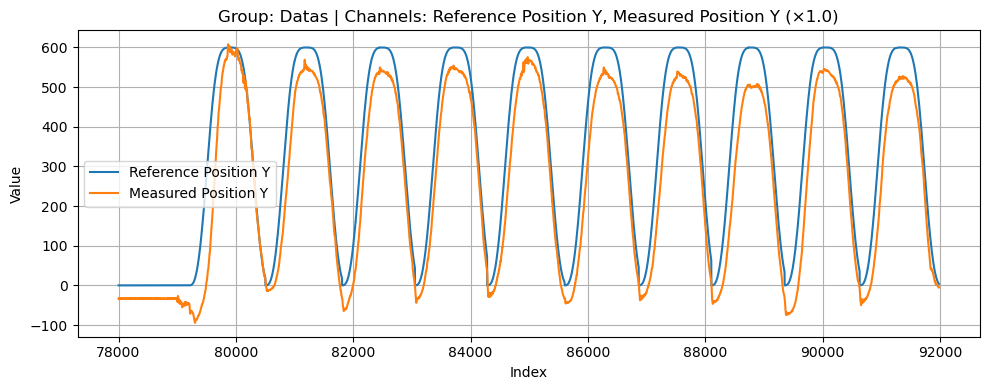

In [ ]:
# 첫 번째 파일 플롯
plot_tdms_channels(
    tdms_file=tdms2,
    group='Datas',
    channels=['Reference Position X','Measured Position X',],
    scale=1.0,
    index_range=(78000, -1),
    figsize=(10, 4),
    sample_rate=None
)

plot_tdms_channels(
    tdms_file=tdms2,
    group='Datas',
    channels=['Reference Position Y','Measured Position Y',],
    scale=1.0,
    index_range=(78000, -1),
    figsize=(10, 4),
    sample_rate=None
)

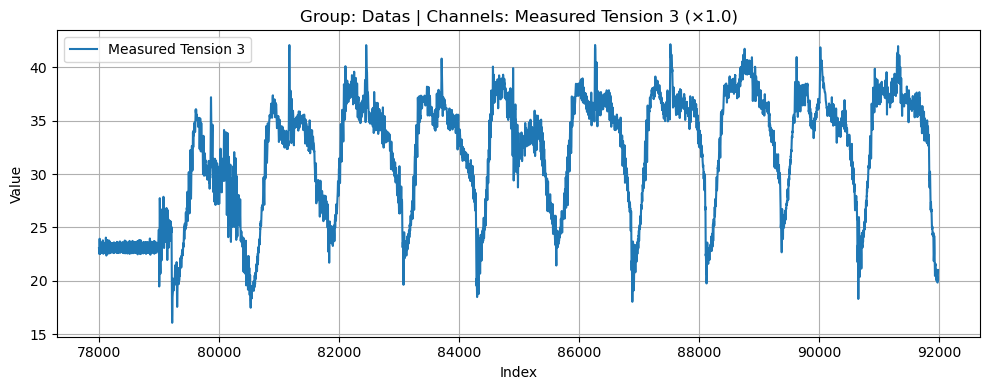

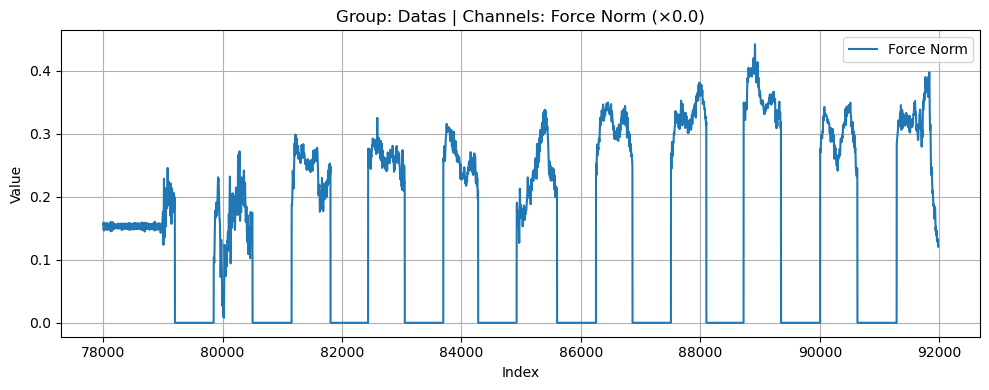

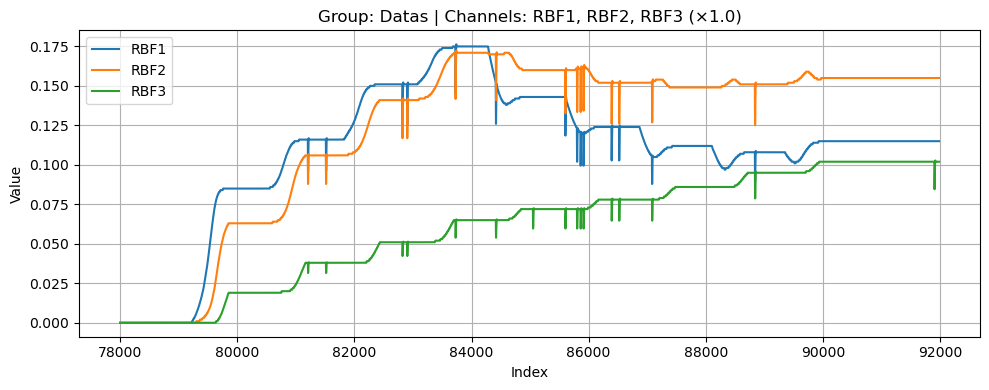

In [ ]:
# # 첫 번째 파일 플롯
# plot_tdms_channels(
#     tdms_file=tdms2,
#     group='Datas',
#     channels=['Reference Tension 1','Reference Tension 2','Reference Tension 3'],
#     scale=1.0,
#     index_range=(78000, -1),
#     figsize=(10, 4),
#     sample_rate=None
# )

plot_tdms_channels(
    tdms_file=tdms2,
    group='Datas',
    channels=['Measured Tension 3'],
    scale=1.0,
    index_range=(78000, -1),
    figsize=(10, 4),
    sample_rate=None
)

plot_tdms_channels(
    tdms_file=tdms2,
    group='Datas',
    channels=['Force Norm'],
    scale=1/50,
    index_range=(78000, -1),
    figsize=(10, 4),
    sample_rate=None
)

plot_tdms_channels(
    tdms_file=tdms2,
    group='Datas',
    channels=['RBF1', 'RBF2', 'RBF3'],
    scale=1.0,
    index_range=(78000, -1),
    figsize=(10, 4),
    sample_rate=None
)

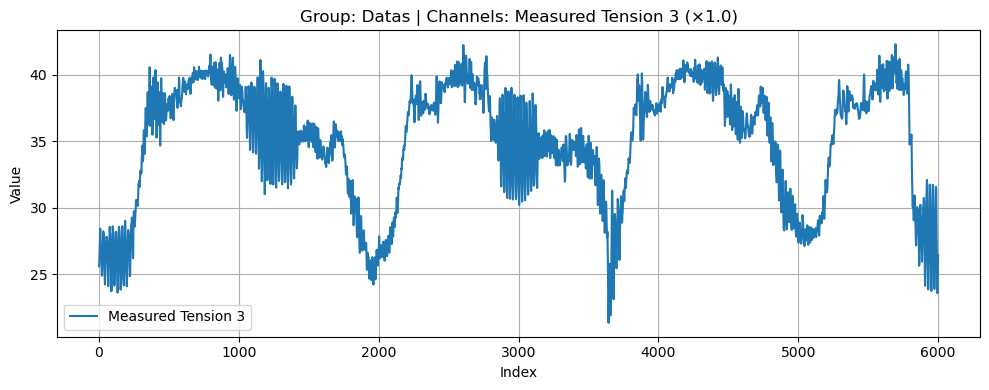

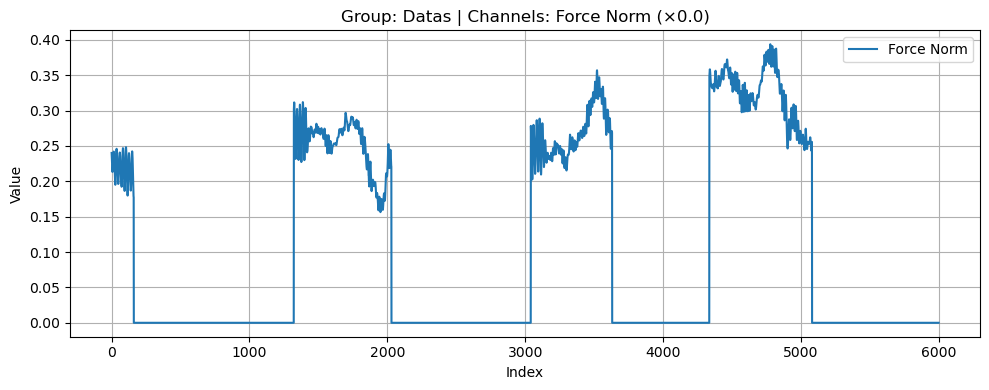

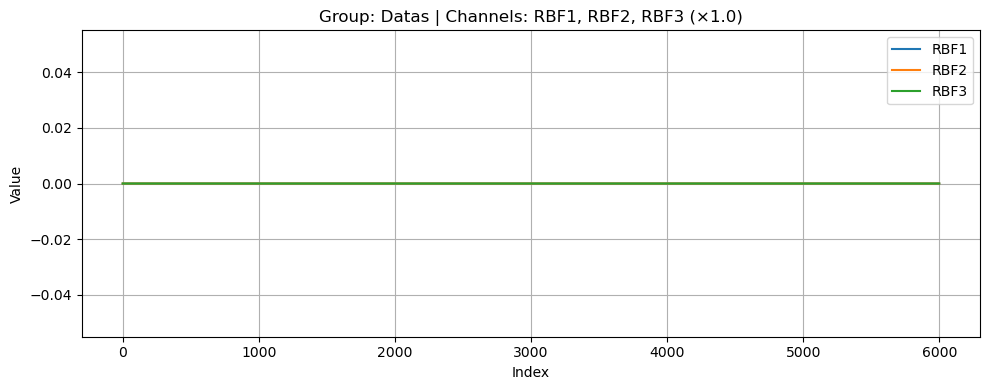

In [ ]:
# # 첫 번째 파일 플롯
# plot_tdms_channels(
#     tdms_file=tdms2,
#     group='Datas',
#     channels=['Reference Tension 1','Reference Tension 2','Reference Tension 3'],
#     scale=1.0,
#     index_range=(78000, -1),
#     figsize=(10, 4),
#     sample_rate=None
# )

plot_tdms_channels(
    tdms_file=tdms3,
    group='Datas',
    channels=['Measured Tension 3'],
    scale=1.0,
    index_range=(0, 6000),
    figsize=(10, 4),
    sample_rate=None
)

plot_tdms_channels(
    tdms_file=tdms3,
    group='Datas',
    channels=['Force Norm'],
    scale=1/50,
    index_range=(0, 6000),
    figsize=(10, 4),
    sample_rate=None
)

plot_tdms_channels(
    tdms_file=tdms3,
    group='Datas',
    channels=['RBF1', 'RBF2', 'RBF3'],
    scale=1.0,
    index_range=(0, 6000),
    figsize=(10, 4),
    sample_rate=None
)

### 05-02 Sand Test - Mine

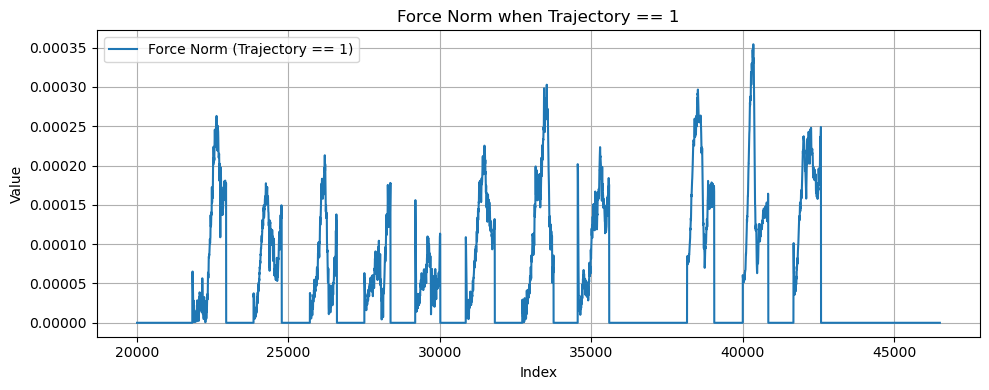

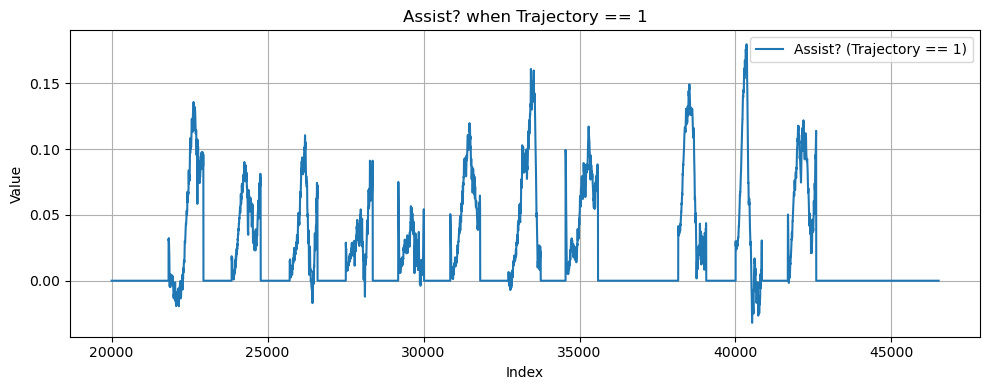

In [ ]:
plot_when_trajectory_is_one(
    tdms_file=tdms4,
    group='Datas',
    signal_channel='Force Norm',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(20000, -1),
    sample_rate=None
)

plot_when_trajectory_is_one(
    tdms_file=tdms4,
    group='Datas',
    signal_channel='Assist?',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(20000, -1),
    sample_rate=None
)

/tmp/ipykernel_766/1869170531.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(force[st:en+1], x[st:en+1])


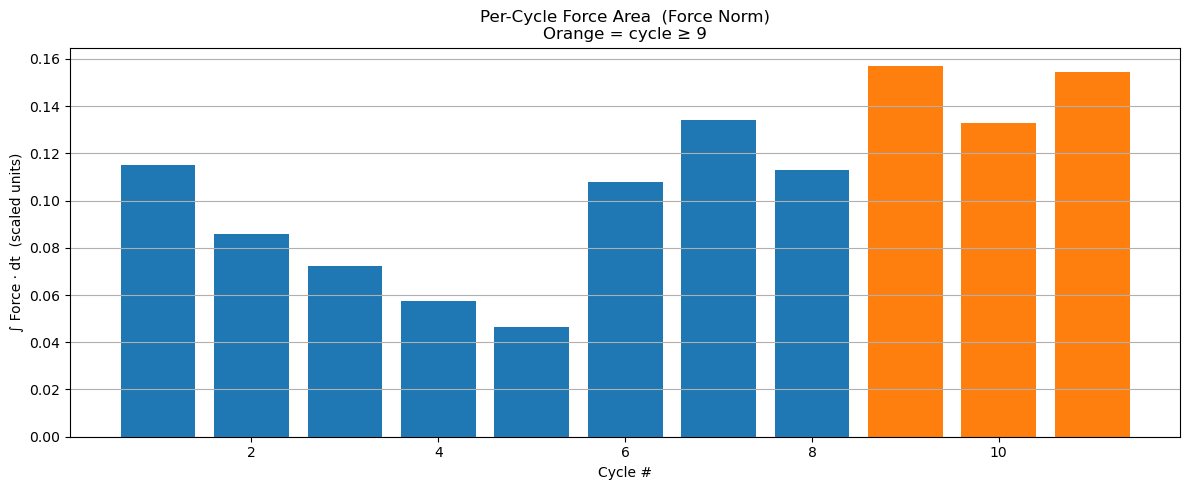

 cycle  start_idx  end_idx     area
     1      21826    22940 0.114930
     2      23848    24776 0.085874
     3      25708    26598 0.072254
     4      27508    28368 0.057436
     5      29187    30012 0.046525
     6      30856    31812 0.107961
     7      32722    33753 0.134027
     8      34553    35590 0.112989
     9      38164    39059 0.156854
    10      40005    40844 0.132864
    11      41678    42585 0.154519


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_force_area_per_cycle(
    tdms_file,
    group: str,
    force_ch: str = "Force Norm",
    traj_ch: str = "Trajectory",
    scale: float = 1.0,
    index_range: tuple[int, int] | None = None,
    sample_rate: float | None = None,
    figsize: tuple[float, float] = (12, 5),
    highlight_from: int | None = None      # ← 하이라이트 시작 사이클
):
    """
    Trajectory == 1인 각 사이클마다 Force 면적을 계산.
    highlight_from ≥ 1 이면, 해당 사이클부터 다른 색으로 표시합니다.
    """
    # ----- 데이터 로딩 -----
    force = tdms_file[group][force_ch][:] * scale
    traj  = tdms_file[group][traj_ch][:]

    n = min(len(force), len(traj))
    force, traj = force[:n], traj[:n]

    # ----- 범위 자르기 -----
    offset = 0
    if index_range is not None:
        s, e = index_range
        if e == -1: e = n
        force, traj = force[s:e], traj[s:e]
        offset = s

    # ----- 사이클 경계 찾기 -----
    inside = traj == 1
    edges  = np.diff(inside.astype(int), prepend=0, append=0)
    starts = np.where(edges ==  1)[0]
    ends   = np.where(edges == -1)[0] - 1

    # ----- 면적 계산 -----
    x = np.arange(len(force)) if sample_rate is None else np.arange(len(force)) / sample_rate
    rows = []
    for i, (st, en) in enumerate(zip(starts, ends), 1):
        area = np.trapz(force[st:en+1], x[st:en+1])
        rows.append({"cycle": i, "start_idx": st+offset, "end_idx": en+offset, "area": area})
    df = pd.DataFrame(rows)

    # ----- 색 결정 -----
    if highlight_from is None:
        colors = ["tab:blue"] * len(df)
    else:
        colors = ["tab:blue" if c < highlight_from else "tab:orange" for c in df["cycle"]]

    # ----- 막대그래프 -----
    plt.figure(figsize=figsize)
    plt.bar(df["cycle"], df["area"], color=colors)
    plt.xlabel("Cycle #")
    plt.ylabel("∫ Force · dt  (scaled units)")
    title = f"Per-Cycle Force Area  ({force_ch})"
    if highlight_from:
        title += f"\nOrange = cycle ≥ {highlight_from}"
    plt.title(title)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

    # ----- 표 출력 -----
    print(df.to_string(index=False))
    return df

df_cycle = plot_force_area_per_cycle(
    tdms_file=tdms4,
    group='Datas',
    force_ch='Force Norm',
    traj_ch='Trajectory',
    scale=1/50,
    index_range=(20000, -1),
    highlight_from=9           # ← 7번 사이클과 그 이후 주황색
)



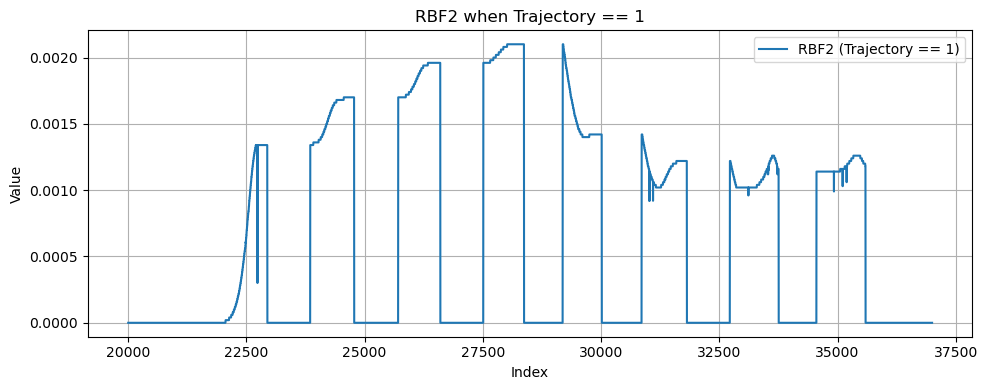

In [ ]:

plot_when_trajectory_is_one(
    tdms_file=tdms4,
    group='Datas',
    signal_channel='RBF2',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(20000, 37000),
    sample_rate=None
)

In [ ]:
def plot_position_error_with_trajectory(
    tdms_file,
    group: str,
    ref_x: str = "Reference Position X",
    ref_y: str = "Reference Position Y",
    act_x: str = "Measured Position X",
    act_y: str = "Measured Position Y",
    trajectory_ch: str = "Trajectory",
    index_range: tuple[int, int] | None = None,
    sample_rate: float | None = None,
    figsize: tuple[float, float] = (10, 4)
):
    """
    Trajectory 값이 1인 구간에 대해서만 2D 위치 오차를 플롯합니다.
    나머지 구간은 0 처리됩니다.
    """
    # --- 데이터 불러오기 ---
    x_ref = tdms_file[group][ref_x][:]
    y_ref = tdms_file[group][ref_y][:]
    x_act = tdms_file[group][act_x][:]
    y_act = tdms_file[group][act_y][:]
    traj = tdms_file[group][trajectory_ch][:]

    # --- 길이 맞추기 ---
    min_len = min(len(x_ref), len(y_ref), len(x_act), len(y_act), len(traj))
    x_ref = x_ref[:min_len]
    y_ref = y_ref[:min_len]
    x_act = x_act[:min_len]
    y_act = y_act[:min_len]
    traj  = traj[:min_len]

    # --- 위치 오차 계산 ---
    error = np.sqrt((x_ref - x_act)**2 + (y_ref - y_act)**2)

    # --- Trajectory == 1인 구간만 유지, 나머지는 0 처리 ---
    error_masked = np.where(traj == 1, error, 0)

    # --- 인덱스 범위 처리 ---
    if index_range is None:
        start, end = 0, min_len
    else:
        start, end = index_range
        if end == -1:  # 파이썬식 슬라이스를 허용
            end = min_len

    # --- X축 생성 ---
    if sample_rate is not None:
        x_axis = np.arange(min_len) / sample_rate
        xlabel = "Time (s)"
    else:
        x_axis = np.arange(min_len)
        xlabel = "Index"

    # --- 플롯 ---
    plt.figure(figsize=figsize)
    plt.plot(x_axis[start:end], error_masked[start:end], label="2D Error (Trajectory == 1)")
    plt.xlabel(xlabel)
    plt.ylabel("Error (distance)")
    plt.title("Position Error when Trajectory == 1")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


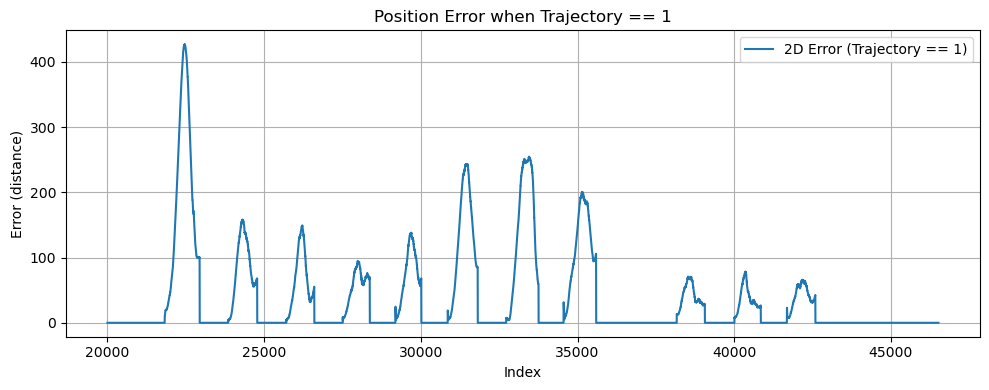

In [ ]:
plot_position_error_with_trajectory(
    tdms_file=tdms4,
    group='Datas',
    ref_x='Reference Position X',
    ref_y='Reference Position Y',
    act_x='Measured Position X',
    act_y='Measured Position Y',
    trajectory_ch='Trajectory',
    index_range=(20000, -1),
    sample_rate=None
)


### Sand 5.5kg Test - ajw

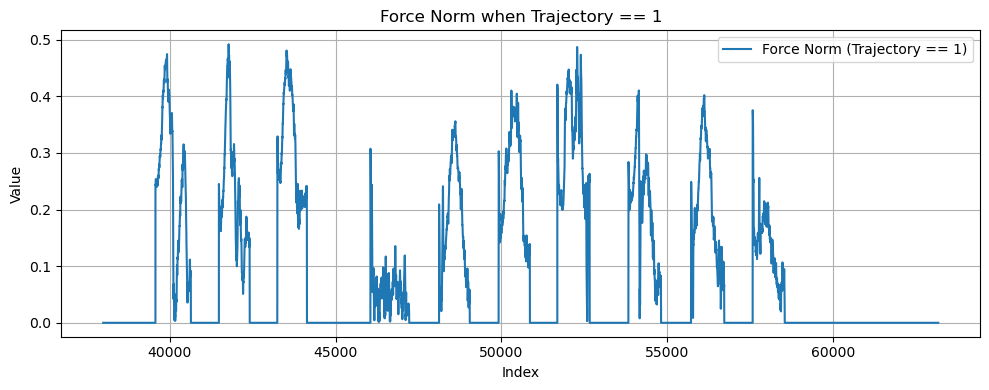

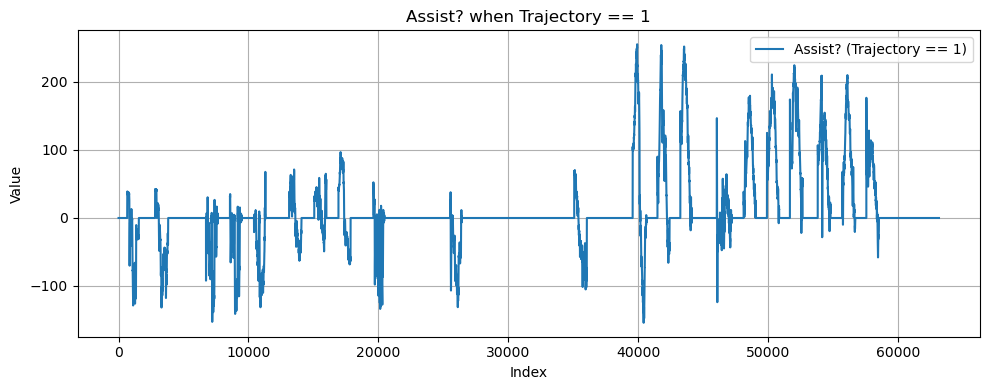

In [ ]:
plot_when_trajectory_is_one(
    tdms_file=tdms5,
    group='Datas',
    signal_channel='Force Norm',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(38000, -1),
    sample_rate=None
)

plot_when_trajectory_is_one(
    tdms_file=tdms5,
    group='Datas',
    signal_channel='Assist?',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(0, -1),
    sample_rate=None
)

/tmp/ipykernel_766/972349197.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(force[st:en+1], x[st:en+1])


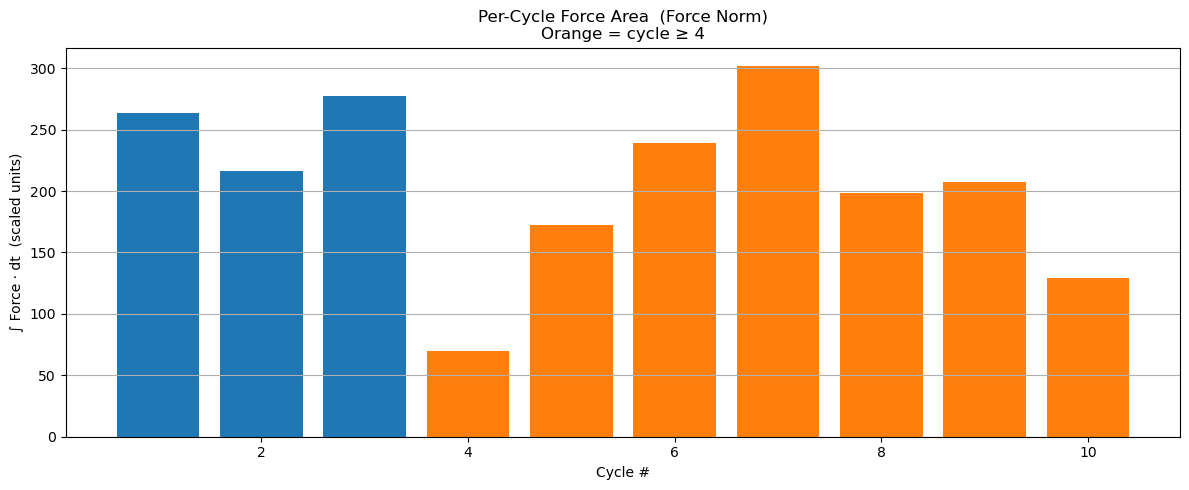

 cycle  start_idx  end_idx       area
     1      39576    40640 263.740123
     2      41487    42412 216.416772
     3      43247    44136 277.304014
     4      46052    47217  69.652419
     5      48120    49041 172.477101
     6      49914    50853 238.742520
     7      51683    52654 301.611251
     8      53824    54804 198.781734
     9      55711    56708 207.597764
    10      57568    58530 128.897010


In [ ]:
def plot_force_area_per_cycle(
    tdms_file,
    group: str,
    force_ch: str = "Force Norm",
    traj_ch: str = "Trajectory",
    scale: float = 1.0,
    index_range: tuple[int, int] | None = None,
    sample_rate: float | None = None,
    figsize: tuple[float, float] = (12, 5),
    highlight_from: int | None = None      # ← 하이라이트 시작 사이클
):
    """
    Trajectory == 1인 각 사이클마다 Force 면적을 계산.
    highlight_from ≥ 1 이면, 해당 사이클부터 다른 색으로 표시합니다.
    """
    # ----- 데이터 로딩 -----
    force = tdms_file[group][force_ch][:] * scale
    traj  = tdms_file[group][traj_ch][:]

    n = min(len(force), len(traj))
    force, traj = force[:n], traj[:n]

    # ----- 범위 자르기 -----
    offset = 0
    if index_range is not None:
        s, e = index_range
        if e == -1: e = n
        force, traj = force[s:e], traj[s:e]
        offset = s

    # ----- 사이클 경계 찾기 -----
    inside = traj == 1
    edges  = np.diff(inside.astype(int), prepend=0, append=0)
    starts = np.where(edges ==  1)[0]
    ends   = np.where(edges == -1)[0] - 1

    # ----- 면적 계산 -----
    x = np.arange(len(force)) if sample_rate is None else np.arange(len(force)) / sample_rate
    rows = []
    for i, (st, en) in enumerate(zip(starts, ends), 1):
        area = np.trapz(force[st:en+1], x[st:en+1])
        rows.append({"cycle": i, "start_idx": st+offset, "end_idx": en+offset, "area": area})
    df = pd.DataFrame(rows)

    # ----- 색 결정 -----
    if highlight_from is None:
        colors = ["tab:blue"] * len(df)
    else:
        colors = ["tab:blue" if c < highlight_from else "tab:orange" for c in df["cycle"]]

    # ----- 막대그래프 -----
    plt.figure(figsize=figsize)
    plt.bar(df["cycle"], df["area"], color=colors)
    plt.xlabel("Cycle #")
    plt.ylabel("∫ Force · dt  (scaled units)")
    title = f"Per-Cycle Force Area  ({force_ch})"
    if highlight_from:
        title += f"\nOrange = cycle ≥ {highlight_from}"
    plt.title(title)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

    # ----- 표 출력 -----
    print(df.to_string(index=False))
    return df

df_cycle = plot_force_area_per_cycle(
    tdms_file=tdms5,
    group='Datas',
    force_ch='Force Norm',
    traj_ch='Trajectory',
    scale=1/50,
    index_range=(38000, -1),
    highlight_from=4           # ← 7번 사이클과 그 이후 주황색
)



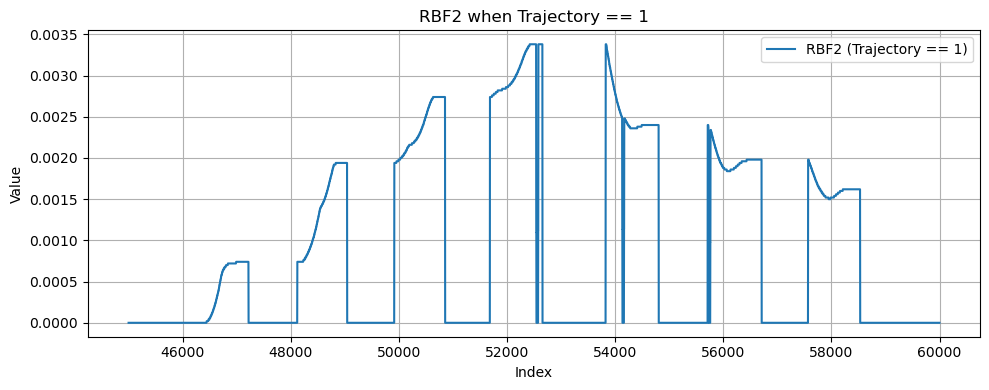

In [ ]:

plot_when_trajectory_is_one(
    tdms_file=tdms5,
    group='Datas',
    signal_channel='RBF2',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(45000, 60000),
    sample_rate=None
)

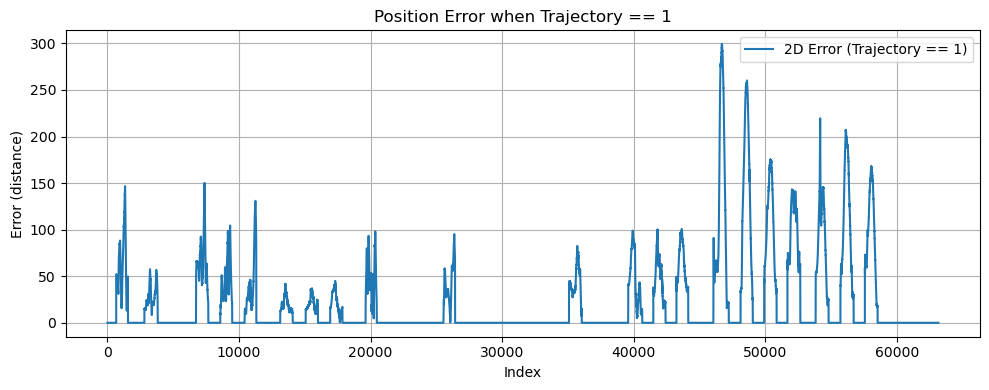

In [ ]:
plot_position_error_with_trajectory(
    tdms_file=tdms5,
    group='Datas',
    ref_x='Reference Position X',
    ref_y='Reference Position Y',
    act_x='Measured Position X',
    act_y='Measured Position Y',
    trajectory_ch='Trajectory',
    index_range=(0, -1),
    sample_rate=None
)


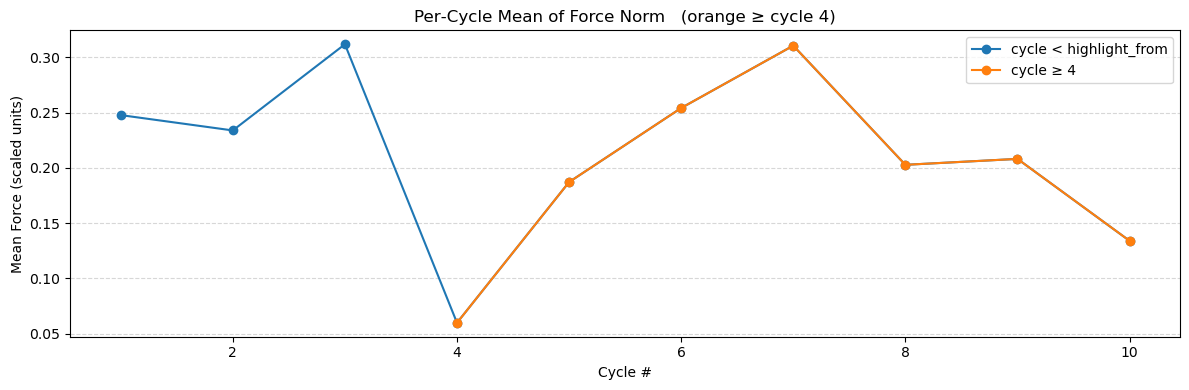

 cycle  start_idx  end_idx     mean
     1      39576    40640 0.247798
     2      41487    42412 0.233914
     3      43247    44136 0.311893
     4      46052    47217 0.059877
     5      48120    49041 0.187212
     6      49914    50853 0.254211
     7      51683    52654 0.310651
     8      53824    54804 0.202814
     9      55711    56708 0.208170
    10      57568    58530 0.134064


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_force_mean_per_cycle(
    tdms_file,
    group: str,
    force_ch: str = "Force Norm",
    traj_ch: str = "Trajectory",
    scale: float = 1.0,
    index_range: tuple[int, int] | None = None,
    figsize: tuple[float, float] = (12, 4),
    highlight_from: int | None = None   # n번 사이클부터 색상 변경
):
    """
    Trajectory == 1인 각 사이클마다 Force의 평균값을 계산하고
    선+점 그래프로 표시한다.
    """
    # --- 데이터 로드 및 스케일 ---
    force = tdms_file[group][force_ch][:] * scale
    traj  = tdms_file[group][traj_ch][:]

    n = min(len(force), len(traj))
    force, traj = force[:n], traj[:n]

    # --- 범위 자르기 ---
    offset = 0
    if index_range is not None:
        s, e = index_range
        if e == -1:
            e = n
        force, traj = force[s:e], traj[s:e]
        offset = s

    # --- Trajectory == 1 구간(사이클) 검출 ---
    inside = traj == 1
    edges  = np.diff(inside.astype(int), prepend=0, append=0)
    starts = np.where(edges ==  1)[0]
    ends   = np.where(edges == -1)[0] - 1

    # --- 평균 계산 ---
    rows = []
    for i, (st, en) in enumerate(zip(starts, ends), 1):
        mean_val = np.mean(force[st:en+1])
        rows.append({
            "cycle": i,
            "start_idx": st + offset,
            "end_idx":   en + offset,
            "mean": mean_val
        })
    df = pd.DataFrame(rows)

    # --- 색상 및 마커 스타일 결정 ---
    if highlight_from is None:
        colors = ["tab:blue"] * len(df)
    else:
        colors = ["tab:blue" if c < highlight_from else "tab:orange"
                  for c in df["cycle"]]

    # --- 플롯 (선 + 점) ---
    plt.figure(figsize=figsize)
    plt.plot(df["cycle"], df["mean"], linestyle='-', marker='o',
             color='tab:blue', label="cycle < highlight_from")
    # 하이라이트된 점만 덮어서 그리기
    if highlight_from is not None:
        idx_hi = df["cycle"] >= highlight_from
        plt.plot(df["cycle"][idx_hi], df["mean"][idx_hi],
                 linestyle='-', marker='o', color='tab:orange',
                 label=f"cycle ≥ {highlight_from}")

    plt.xlabel("Cycle #")
    plt.ylabel("Mean Force (scaled units)")
    title = f"Per‑Cycle Mean of {force_ch}"
    if highlight_from:
        title += f"   (orange ≥ cycle {highlight_from})"
    plt.title(title)
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- 표 출력 ---
    print(df.to_string(index=False))
    return df

df_mean = plot_force_mean_per_cycle(
    tdms_file=tdms5,
    group='Datas',
    force_ch='Force Norm',
    traj_ch='Trajectory',
    scale=1/50,
    index_range=(38000, -1),
    highlight_from=4               # 4번 사이클 이상을 주황색
)


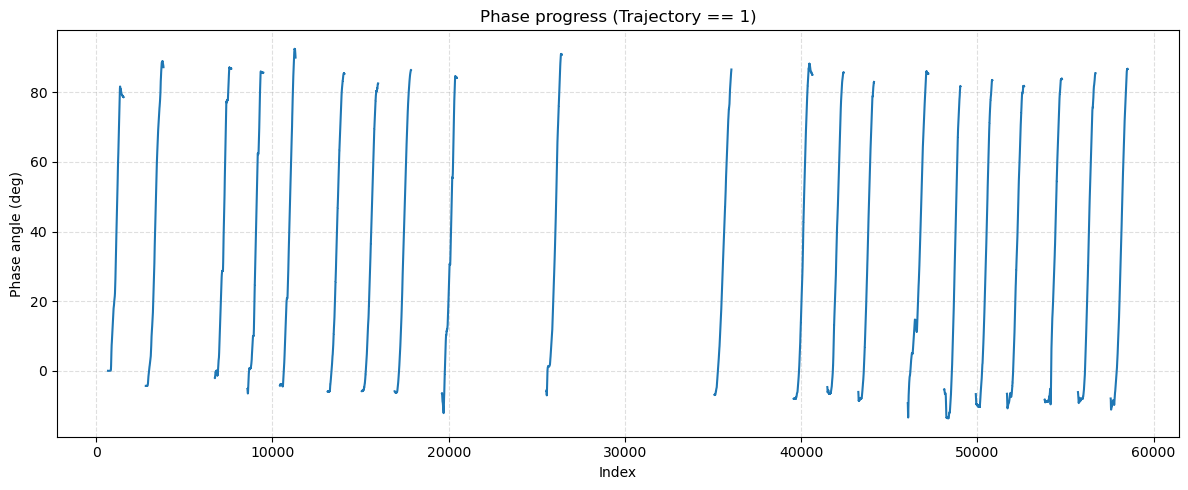

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_phase_angle(
    tdms_file,
    group: str,
    act_x: str = "Measured Position X",
    act_y: str = "Measured Position Y",
    traj_ch: str = "Trajectory",
    index_range: tuple[int, int] | None = None,
    sample_rate: float | None = None,
    figsize: tuple[float, float] = (12, 5)
):
    """
    Trajectory == 1인 구간 동안 (X, Y)의 원점 기준 각도(°)만 플롯.
    """
    # --- 데이터 로드 ---
    x = tdms_file[group][act_x][:]
    y = tdms_file[group][act_y][:]
    traj = tdms_file[group][traj_ch][:]

    n = min(len(x), len(y), len(traj))
    x, y, traj = x[:n], y[:n], traj[:n]

    # --- 범위 자르기 ---
    offset = 0
    if index_range is not None:
        s, e = index_range
        if e == -1: e = n
        x, y, traj = x[s:e], y[s:e], traj[s:e]
        offset = s
        n = len(x)

    # --- 각도 계산 (deg) & unwrap ---
    angle_rad = np.arctan2(y, x)          # (-π, π]
    angle_deg = np.degrees(np.unwrap(angle_rad))
    angle_deg -= angle_deg[0]             # 0°에서 시작하도록 시프트

    # --- Trajectory == 1 구간만 유지 ---
    angle_masked = np.where(traj == 1, angle_deg, np.nan)

    # --- X축 ---
    t = np.arange(offset, offset + n) if sample_rate is None \
        else np.arange(n) / sample_rate
    xlabel = "Index" if sample_rate is None else "Time (s)"

    # --- 플롯 ---
    plt.figure(figsize=figsize)
    plt.plot(t, angle_masked, color="tab:blue")
    plt.xlabel(xlabel)
    plt.ylabel("Phase angle (deg)")
    plt.title("Phase progress (Trajectory == 1)")
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


plot_phase_angle(
    tdms_file=tdms5,
    group='Datas',
    act_x='Measured Position X',
    act_y='Measured Position Y',
    traj_ch='Trajectory',
    index_range=(0, -1),   # 원하는 영역
    sample_rate=None           # 샘플레이트(Hz) 있으면 넣으면 시간축
)


### 05-09 Test 1

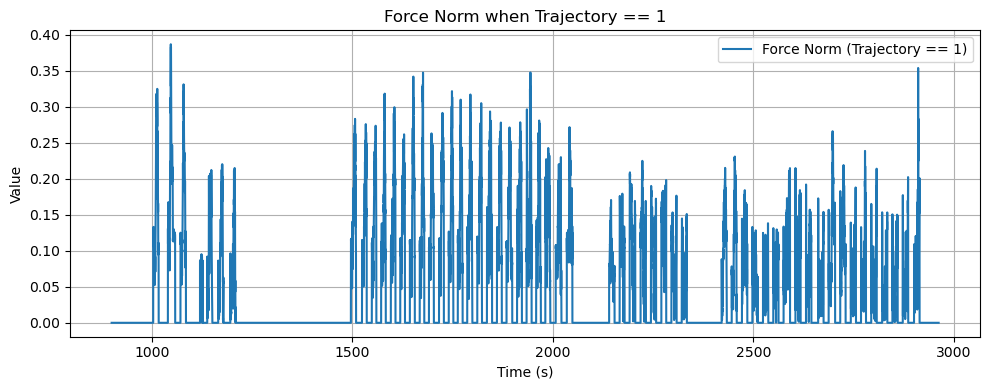

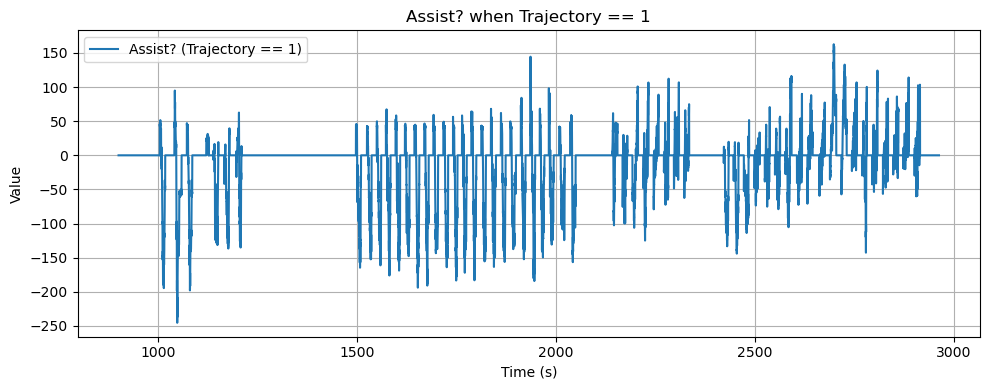

In [ ]:
plot_when_trajectory_is_one(
    tdms_file=tdms7,
    group='Datas',
    signal_channel='Force Norm',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(45000, -1),
    sample_rate=50
)

plot_when_trajectory_is_one(
    tdms_file=tdms7,
    group='Datas',
    signal_channel='Assist?',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(45000, -1),
    sample_rate=50
)

/tmp/ipykernel_824/2382043268.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(force[st:en+1], x[st:en+1])


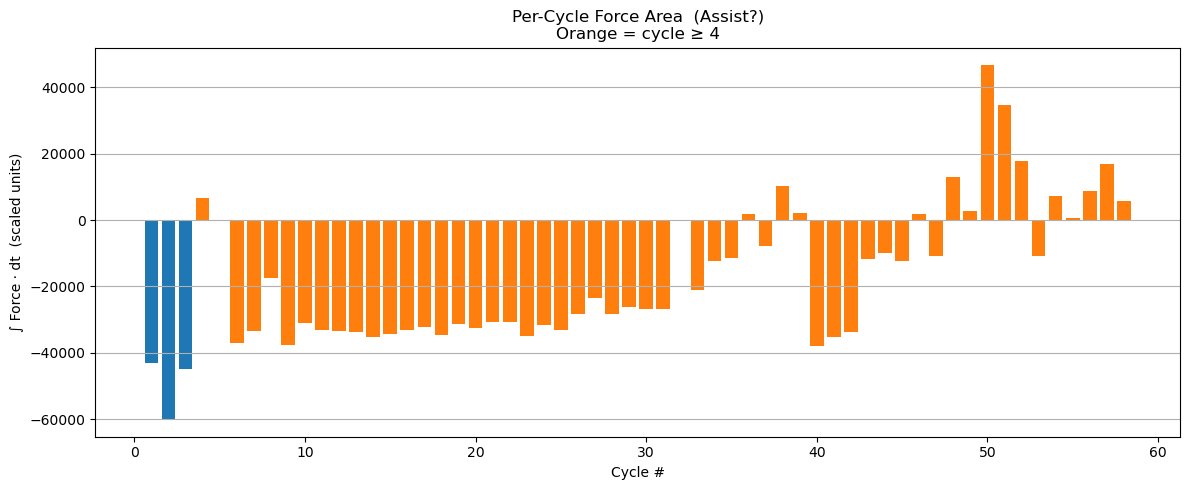

 cycle  start_idx  end_idx          area
     1      50183    50854 -43018.596112
     2      52014    52912 -59915.151470
     3      53581    54255 -44910.121980
     4      56019    56285   6522.925259
     5      56345    56347     50.173245
     6      56921    57539 -37014.954198
     7      58287    58936 -33413.278633
     8      59799    60455 -17488.272494
     9      74829    75465 -37694.567047
    10      76214    76792 -31011.251882
    11      77440    77994 -33227.743558
    12      78601    79168 -33358.365103
    13      79809    80378 -33680.922098
    14      80985    81561 -35315.827523
    15      82183    82789 -34340.248937
    16      83410    83967 -33187.331433
    17      84562    85159 -32151.693935
    18      85818    86410 -34711.614902
    19      87033    87583 -31185.843954
    20      88159    88750 -32399.359330
    21      89335    89950 -30801.730920
    22      90588    91153 -30643.730440
    23      91789    92422 -34894.840011
    24      9303

In [ ]:
def plot_force_area_per_cycle(
    tdms_file,
    group: str,
    force_ch: str = "Force Norm",
    traj_ch: str = "Trajectory",
    scale: float = 1.0,
    index_range: tuple[int, int] | None = None,
    sample_rate: float | None = None,
    figsize: tuple[float, float] = (12, 5),
    highlight_from: int | None = None      # ← 하이라이트 시작 사이클
):
    """
    Trajectory == 1인 각 사이클마다 Force 면적을 계산.
    highlight_from ≥ 1 이면, 해당 사이클부터 다른 색으로 표시합니다.
    """
    # ----- 데이터 로딩 -----
    force = tdms_file[group][force_ch][:] * scale
    traj  = tdms_file[group][traj_ch][:]

    n = min(len(force), len(traj))
    force, traj = force[:n], traj[:n]

    # ----- 범위 자르기 -----
    offset = 0
    if index_range is not None:
        s, e = index_range
        if e == -1: e = n
        force, traj = force[s:e], traj[s:e]
        offset = s

    # ----- 사이클 경계 찾기 -----
    inside = traj == 1
    edges  = np.diff(inside.astype(int), prepend=0, append=0)
    starts = np.where(edges ==  1)[0]
    ends   = np.where(edges == -1)[0] - 1

    # ----- 면적 계산 -----
    x = np.arange(len(force)) if sample_rate is None else np.arange(len(force)) / sample_rate
    rows = []
    for i, (st, en) in enumerate(zip(starts, ends), 1):
        area = np.trapz(force[st:en+1], x[st:en+1])
        rows.append({"cycle": i, "start_idx": st+offset, "end_idx": en+offset, "area": area})
    df = pd.DataFrame(rows)

    # ----- 색 결정 -----
    if highlight_from is None:
        colors = ["tab:blue"] * len(df)
    else:
        colors = ["tab:blue" if c < highlight_from else "tab:orange" for c in df["cycle"]]

    # ----- 막대그래프 -----
    plt.figure(figsize=figsize)
    plt.bar(df["cycle"], df["area"], color=colors)
    plt.xlabel("Cycle #")
    plt.ylabel("∫ Force · dt  (scaled units)")
    title = f"Per-Cycle Force Area  ({force_ch})"
    if highlight_from:
        title += f"\nOrange = cycle ≥ {highlight_from}"
    plt.title(title)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

    # ----- 표 출력 -----
    print(df.to_string(index=False))
    return df

df_cycle = plot_force_area_per_cycle(
    tdms_file=tdms7,
    group='Datas',
    force_ch='Assist?',
    traj_ch='Trajectory',
    scale=1/50,
    index_range=(0, -1),
    highlight_from=4           # ← 7번 사이클과 그 이후 주황색
)



### 05-09 Test2

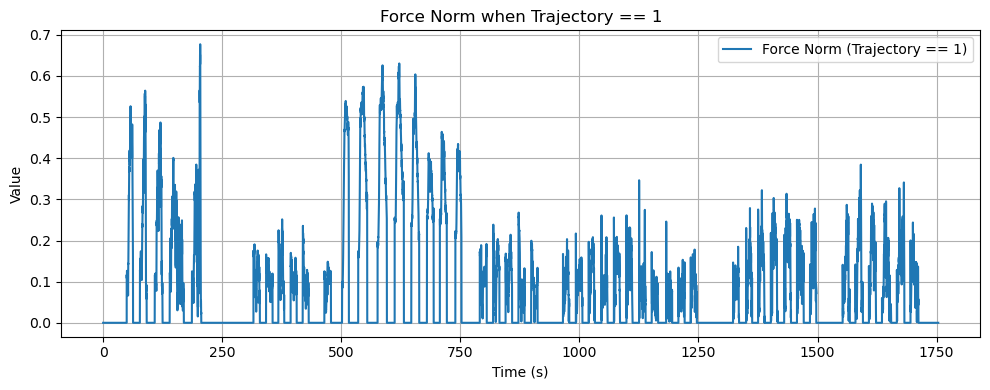

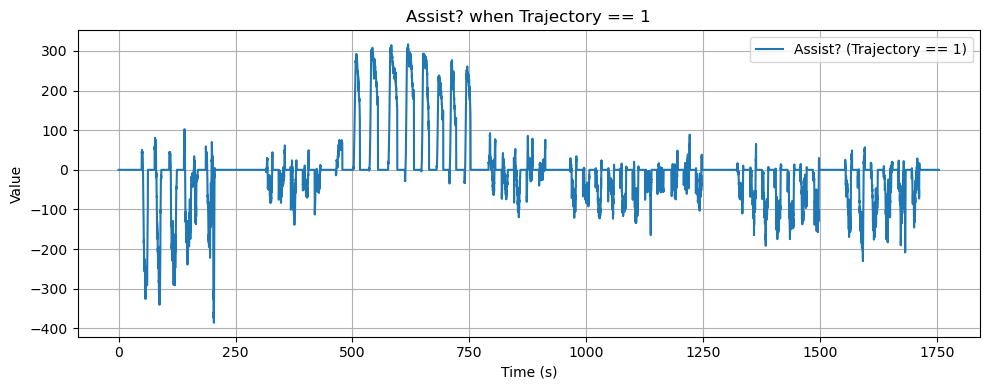

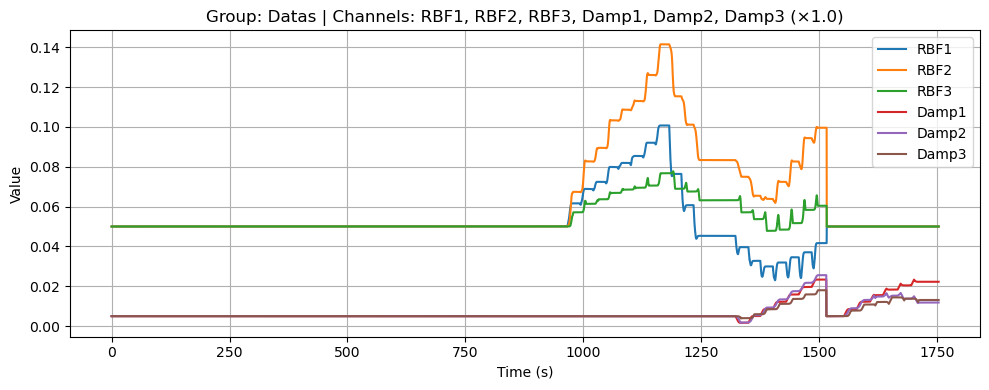

In [ ]:
plot_when_trajectory_is_one(
    tdms_file=tdms6,
    group='Datas',
    signal_channel='Force Norm',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(0, -1),
    sample_rate=50
)

plot_when_trajectory_is_one(
    tdms_file=tdms6,
    group='Datas',
    signal_channel='Assist?',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1/50,                       # 필요한 스케일
    index_range=(0, -1),
    sample_rate=50
)
plot_tdms_channels(
    tdms_file=tdms6,
    group='Datas',
    channels=['RBF1', 'RBF2', 'RBF3', 'Damp1', 'Damp2', 'Damp3'],
    scale=1.0,
    index_range=(0, -1),
    figsize=(10, 4),
    sample_rate=50
)

/tmp/ipykernel_824/1421393031.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(force[st:en+1], x[st:en+1])


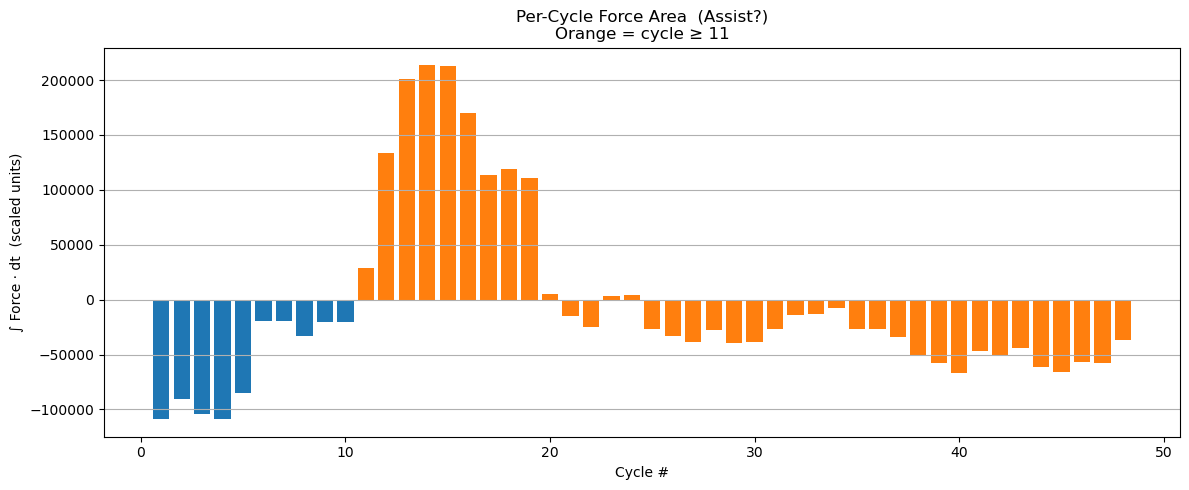

 cycle  start_idx  end_idx           area
     1       2472     3128 -108692.233572
     2       3854     4560  -90764.105899
     3       5412     6222 -104186.765518
     4       6983     8461 -108419.944158
     5       9316    10291  -85301.858743
     6      15780    16443  -19691.051153
     7      17101    17778  -19592.714596
     8      18392    19002  -32762.579020
     9      19682    20309  -20254.204483
    10      20948    21571  -20492.846131
    11      23223    23909   29269.530210
    12      25079    25788  133916.694577
    13      26776    27716  201343.874503
    14      28811    29779  213358.691468
    15      30605    31564  212642.737790
    16      32349    33174  169943.916985
    17      33989    34691  113566.908947
    18      35350    36074  118702.752451
    19      36976    37614  110918.530763
    20      39541    40262    5503.719648
    21      40938    41596  -14532.521466
    22      42250    42926  -24977.382530
    23      43598    44234    3597

In [ ]:
def plot_force_area_per_cycle(
    tdms_file,
    group: str,
    force_ch: str = "Force Norm",
    traj_ch: str = "Trajectory",
    scale: float = 1.0,
    index_range: tuple[int, int] | None = None,
    sample_rate: float | None = None,
    figsize: tuple[float, float] = (12, 5),
    highlight_from: int | None = None      # ← 하이라이트 시작 사이클
):
    """
    Trajectory == 1인 각 사이클마다 Force 면적을 계산.
    highlight_from ≥ 1 이면, 해당 사이클부터 다른 색으로 표시합니다.
    """
    # ----- 데이터 로딩 -----
    force = tdms_file[group][force_ch][:] * scale
    traj  = tdms_file[group][traj_ch][:]

    n = min(len(force), len(traj))
    force, traj = force[:n], traj[:n]

    # ----- 범위 자르기 -----
    offset = 0
    if index_range is not None:
        s, e = index_range
        if e == -1: e = n
        force, traj = force[s:e], traj[s:e]
        offset = s

    # ----- 사이클 경계 찾기 -----
    inside = traj == 1
    edges  = np.diff(inside.astype(int), prepend=0, append=0)
    starts = np.where(edges ==  1)[0]
    ends   = np.where(edges == -1)[0] - 1

    # ----- 면적 계산 -----
    x = np.arange(len(force)) if sample_rate is None else np.arange(len(force)) / sample_rate
    rows = []
    for i, (st, en) in enumerate(zip(starts, ends), 1):
        area = np.trapz(force[st:en+1], x[st:en+1])
        rows.append({"cycle": i, "start_idx": st+offset, "end_idx": en+offset, "area": area})
    df = pd.DataFrame(rows)

    # ----- 색 결정 -----
    if highlight_from is None:
        colors = ["tab:blue"] * len(df)
    else:
        colors = ["tab:blue" if c < highlight_from else "tab:orange" for c in df["cycle"]]

    # ----- 막대그래프 -----
    plt.figure(figsize=figsize)
    plt.bar(df["cycle"], df["area"], color=colors)
    plt.xlabel("Cycle #")
    plt.ylabel("∫ Force · dt  (scaled units)")
    title = f"Per-Cycle Force Area  ({force_ch})"
    if highlight_from:
        title += f"\nOrange = cycle ≥ {highlight_from}"
    plt.title(title)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

    # ----- 표 출력 -----
    print(df.to_string(index=False))
    return df

df_cycle = plot_force_area_per_cycle(
    tdms_file=tdms6,
    group='Datas',
    force_ch='Assist?',
    traj_ch='Trajectory',
    scale=1/50,
    index_range=(0, -1),
    highlight_from=11           # ← 7번 사이클과 그 이후 주황색
)



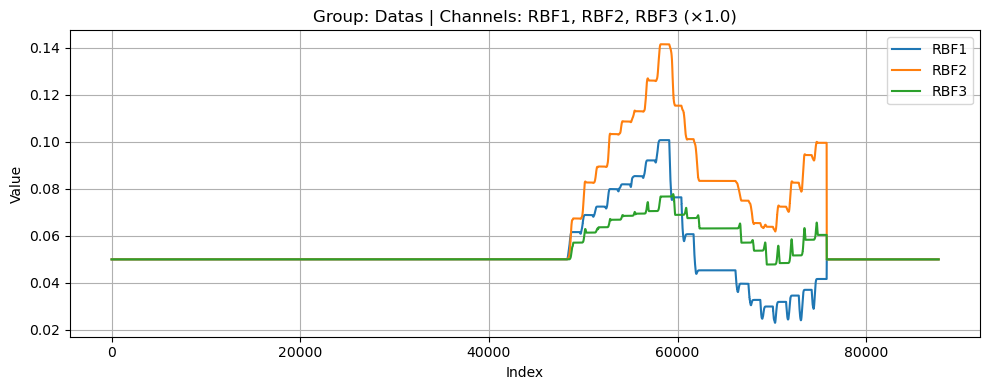

In [ ]:
plot_tdms_channels(
    tdms_file=tdms6,
    group='Datas',
    channels=['RBF1', 'RBF2', 'RBF3'],
    scale=1.0,
    index_range=(0, -1),
    figsize=(10, 4),
    sample_rate=None
)

# 05-14

In [10]:
# tdms1 = load_tdms("data/25-04-29.tdms")
# tdms2 = load_tdms("data/25-04-30_2.tdms")  # 맨 앞과 뒤 데이터만 사용; 사람없이 궤적:15초, 빈 박스들고 
# tdms3 = load_tdms("data/25-04-30_3.tdms")  # 학습X, 일정한 임피던스
# tdms4 = load_tdms("data/25-05-02_2.tdms")  # 학습X, 일정한 임피던스
# tdms5 = load_tdms("data/25-05-02_ajw.tdms")  # 
# tdms6 = load_tdms("data/25-05-09_1.tdms") # 이게 나중에 한거
# tdms7 = load_tdms("data/25-05-09_2.tdms") # 이게 먼저 한거

tdms = load_tdms("data/25-05-14_2.tdms")
print_available(tdms)

✅ Available groups and channels:
 - Group: Datas
    • Time (ms)
    • Reference Position X
    • Reference Position Y
    • Measured Position X
    • Measured Position Y
    • Reference Tension L
    • Reference Tension R
    • Reference Tension T
    • Measured Tension L
    • Measured Tension R
    • Measured Tension T
    • RBF1
    • RBF2
    • RBF3
    • Trajectory
    • Performance
    • Force X
    • Force y
    • Damp1
    • Damp2
    • Damp3


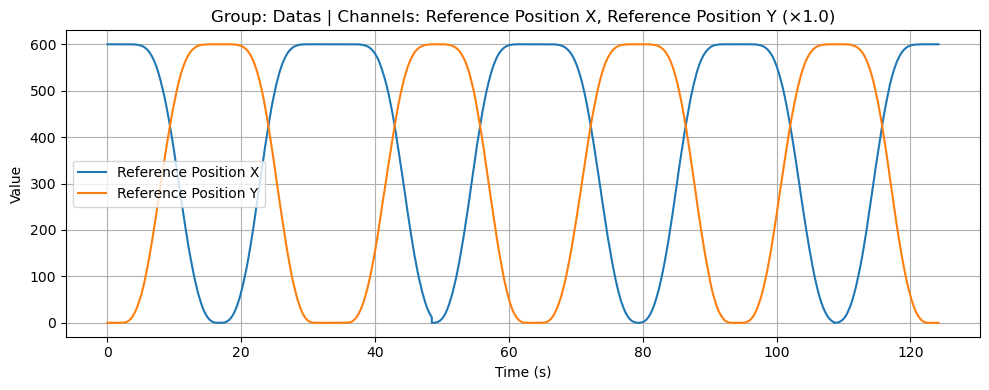

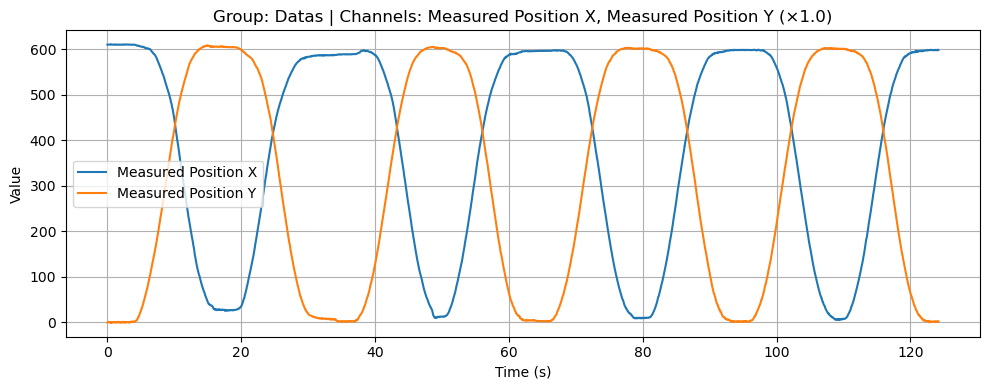

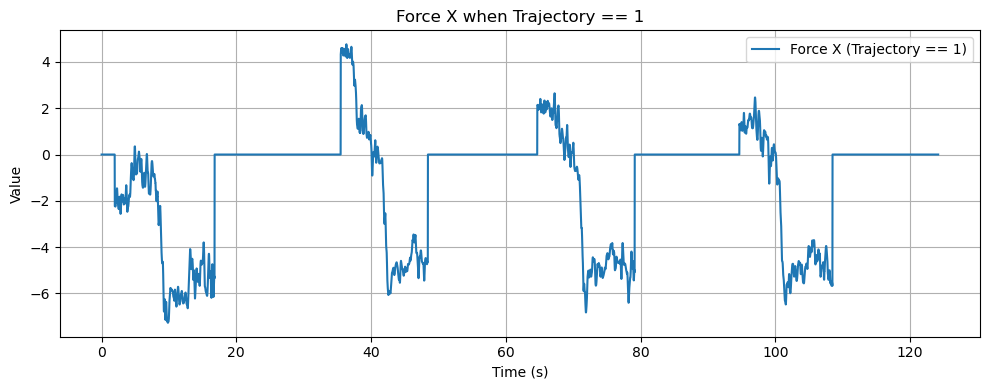

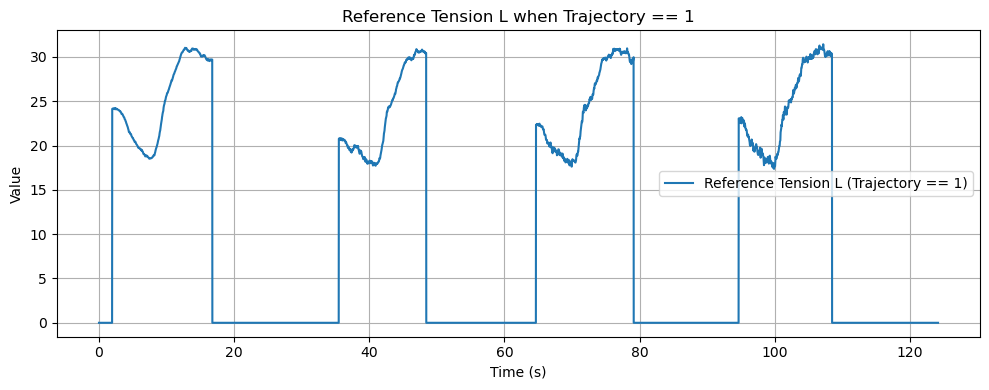

In [12]:
plot_tdms_channels(
    tdms_file=tdms,
    group='Datas',
    channels=['Reference Position X','Reference Position Y'],
    scale=1.0,
    index_range=(0, -1),
    figsize=(10, 4),
    sample_rate=50
)

plot_tdms_channels(
    tdms_file=tdms,
    group='Datas',
    channels=['Measured Position X','Measured Position Y'],
    scale=1.0,
    index_range=(0, -1),
    figsize=(10, 4),
    sample_rate=50
)

plot_when_trajectory_is_one(
    tdms_file=tdms,
    group='Datas',
    signal_channel='Force X',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1,                       # 필요한 스케일
    index_range=(0, -1),
    sample_rate=50
)

plot_when_trajectory_is_one(
    tdms_file=tdms,
    group='Datas',
    signal_channel='Reference Tension L',
    trajectory_channel='Trajectory',  # Trajectory 채널 이름
    scale=1,                       # 필요한 스케일
    index_range=(0, -1),
    sample_rate=50
)